In [2]:
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt

#import scipy.stats
#import sklearn.linear_model as lm
#from sklearn.model_selection import train_test_split

#import plotly.express as px
#import xarray as xr

#import sqlalchemy
#from pathlib import Path

In [3]:
pollinator1 = pd.read_csv('datasets/plant_pollinator_diversity_set1.csv')
pollinator2 = pd.read_csv('datasets/plant_pollinator_diversity_set2.csv')

In [4]:
pollinator2.head()

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,FLW_STATUS,PLTSP_CODE,PLTSP_NAME,NO_STALK,NO_FLWS,QC_NOTES
0,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-20,1.0,ND,1,NaN,NaN,NaN,NaN,NaN,NaN
1,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,ACHIMILL,Achillea millefolium,4.0,36.0,NaN
2,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,ERIGFOLI,Erigeron foliosus,14.0,1.0,NaN
3,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,VICIAMER,Vicia americana,3.0,2.3,NaN
4,SA026,2,Bunchgrass,BD,BGD01,2011,2011-08-02,3.0,"Andy, Tim",1,FLW,ACHIMILL,Achillea millefolium,2.0,26.0,NaN


In [5]:
pollinator2.shape

(22619, 16)

### Comparison between pollinator1 and pollinator2 datasets

In [6]:
pollinator1[pollinator1['SAMPLEDATE'] == "2015-06-29"].head()

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,...,PPI_STATUS,NO_INT,PLTSP_CODE,PLTSP_NAME,VISSP_CODE,VISSP_NAME,VISSP_TYPE,REF_NO,VISSP_NO,QC_NOTES
7100,SA026,1,Carpenter,CPB,CPB01,2015,2015-06-29,1.0,KJ,1,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
7101,SA026,1,Carpenter,CPB,CPB01,2015,2015-06-29,1.0,KJ,1,...,1,1.0,CIRSCALL,Cirsium callilepis,BOMBFLAV,Bombus flavifrons,social bee,field id,1,NaN
7102,SA026,1,Carpenter,CPB,CPB01,2015,2015-06-29,1.0,KJ,1,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
7103,SA026,1,Carpenter,CPB,CPB01,2015,2015-06-29,1.0,KJ,1,...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
7104,SA026,1,Carpenter,CPB,CPB01,2015,2015-06-29,1.0,KJ,1,...,1,2.0,LIGUGRAY,Ligusticum grayi,BOMBBIFA,Bombus bifarius,social bee,34776,1,NaN


In [7]:
pollinator2[pollinator2['SAMPLEDATE'] == "2015-06-29"].head()

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,FLW_STATUS,PLTSP_CODE,PLTSP_NAME,NO_STALK,NO_FLWS,QC_NOTES
2564,SA026,2,Carpenter,CPB,CPB01,2015,2015-06-29,1.0,KJ,1,FLW,ACHIMILL,Achillea millefolium,2.0,8.0,NaN
2565,SA026,2,Carpenter,CPB,CPB01,2015,2015-06-29,1.0,KJ,1,FLW,CARESPXX,Carex sp,4.0,1.0,NaN
2566,SA026,2,Carpenter,CPB,CPB01,2015,2015-06-29,1.0,KJ,1,FLW,CIRSCALL,Cirsium callilepis,5.0,1.5,NaN
2567,SA026,2,Carpenter,CPB,CPB01,2015,2015-06-29,1.0,KJ,1,FLW,ERIGALFO,Erigeron aliceae & foliosus,61.0,2.3,NaN
2568,SA026,2,Carpenter,CPB,CPB01,2015,2015-06-29,1.0,KJ,1,FLW,LIGUGRAY,Ligusticum grayi,4.0,65.0,NaN


In [8]:
pollinator2.columns

Index(['DBCODE', 'ENTITY', 'COMPLEX', 'MEADOW', 'PLOT_ID', 'YEAR',
       'SAMPLEDATE', 'WATCH', 'OBSERVER', 'PLOT', 'FLW_STATUS', 'PLTSP_CODE',
       'PLTSP_NAME', 'NO_STALK', 'NO_FLWS', 'QC_NOTES'],
      dtype='object')

In [9]:
pollinator1[pollinator1['YEAR'] == 2018].groupby('YEAR')['VISSP_NAME'].value_counts()

YEAR  VISSP_NAME            
2018  Apis mellifera            2834
      Bombus mixtus             2673
      Bombus bifarius           2583
      Bombus vosnesenskii       1035
      Syrphidae                  297
                                ... 
      Schinia honesta              1
      Schinia sp                   1
      Sericomyia chalcopyga        1
      Toxomerus occidentalis       1
      Xysticus sp                  1
Name: VISSP_NAME, Length: 161, dtype: int64

#### Total number of stalks per year

<AxesSubplot:xlabel='YEAR', ylabel='TOT_STALKS'>

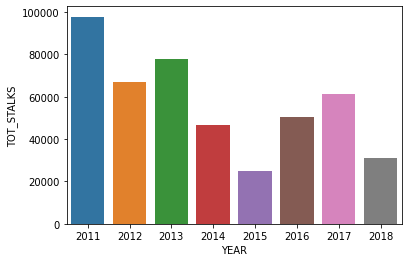

In [15]:
smp = pollinator2.groupby('YEAR')[['YEAR', 'NO_STALK']] \
.agg({'YEAR':'first','NO_STALK':'sum'}) \
.rename(columns={'NO_STALK':'TOT_STALKS'})

sns.barplot(data=smp, x='YEAR', y='TOT_STALKS')


<AxesSubplot:xlabel='YEAR'>

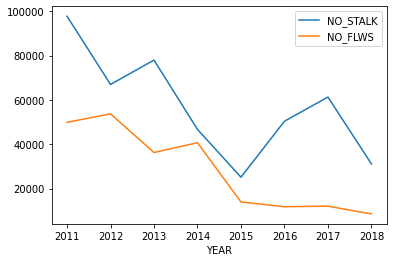

In [38]:
flw = pollinator2.groupby('YEAR', as_index=True)[['NO_STALK', 'NO_FLWS']] \
.agg({'NO_STALK': 'sum', 'NO_FLWS': 'sum'})

flw.plot()